**Task 1: Movie Recommendation System**

✅ Step 1: Import Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


  ✅ Step 2: Load Dataset

In [ ]:
movies = pd.read_csv("/content/movies.csv")
print(movies.head())


   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


✅ Step 3: Preprocess Genres

In [ ]:
movies['genres'] = movies['genres'].str.replace('|', ' ', regex=False)
movies['genres'] = movies['genres'].fillna('')

✅ Step 4: TF-IDF Vectorization on Genres

In [ ]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies['genres'])
print("TF-IDF matrix shape:", tfidf_matrix.shape)

TF-IDF matrix shape: (9742, 23)


✅ Step 5: Compute Cosine Similarity

In [ ]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

✅ Step 6: Build a Movie Index

In [ ]:
indices = pd.Series(movies.index, index=movies['title']).drop_duplicates()

✅ Step 7: Recommendation Function

In [ ]:
def recommend_movies(title, num_recommendations=5):
    if title not in indices:
        return "Movie not found."

    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:num_recommendations+1]
    movie_indices = [i[0] for i in sim_scores]

    return movies[['title', 'genres']].iloc[movie_indices]

✅ Step 8: Try It Out!

In [ ]:
recommend_movies("Toy Story (1995)")

,title,genres
1706,Antz (1998),Adventure Animation Children Comedy Fantasy
2355,Toy Story 2 (1999),Adventure Animation Children Comedy Fantasy
2809,"Adventures of Rocky and Bullwinkle, The (2000)",Adventure Animation Children Comedy Fantasy
3000,"Emperor's New Groove, The (2000)",Adventure Animation Children Comedy Fantasy
3568,"Monsters, Inc. (2001)",Adventure Animation Children Comedy Fantasy


✅ Optional Bonus: Streamlit UI (Simple)

In [ ]:
pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 67.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 94.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.3 MB/s eta 0:00:00


In [ ]:
!pip install streamlit


In [ ]:
import streamlit as st
st.title("🎬 Movie Recommender")
movie_name = st.text_input("Enter a Movie Title:")

if st.button("Recommend"):
    recommendations = recommend_movies(movie_name)
    if isinstance(recommendations, str):
        st.write(recommendations)
    else:
        st.write("Top Recommendations:")
        st.dataframe(recommendations)


2025-07-08 09:37:25.120 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-08 09:37:25.273 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-07-08 09:37:25.277 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-08 09:37:25.281 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-08 09:37:25.285 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-08 09:37:25.289 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-08 09:37:25.290 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-08 09:37:25.293 Thread 'MainThread': mi

✅ Testing the UI

In [ ]:
import streamlit as st
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load movie data
movies = pd.read_csv("/content/movies.csv")
movies['genres'] = movies['genres'].str.replace('|', ' ', regex=False)
movies['genres'] = movies['genres'].fillna('')

# TF-IDF vectorization
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies['genres'])

# Cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Index mapping
indices = pd.Series(movies.index, index=movies['title']).drop_duplicates()

# Recommendation logic
def recommend_movies(title, num_recommendations=5):
    if title not in indices:
        return "❌ Movie not found. Please try again."
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:num_recommendations+1]
    movie_indices = [i[0] for i in sim_scores]
    return movies[['title', 'genres']].iloc[movie_indices]

# Streamlit UI
st.title("🎬 Movie Recommender System")

movie_name = st.text_input("Enter a movie title (e.g., Toy Story (1995))")

if st.button("Recommend"):
    with st.spinner("Finding similar movies..."):
        recommendations = recommend_movies(movie_name)
        if isinstance(recommendations, str):
            st.warning(recommendations)
        else:
            st.success("Top Recommendations:")
            st.dataframe(recommendations)


2025-07-08 09:38:52.758 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-08 09:38:52.762 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-08 09:38:52.764 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-08 09:38:52.766 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-08 09:38:52.771 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-08 09:38:52.777 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-08 09:38:52.783 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-08 09:38:52.784 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

**✅ TASK 2: Stock Price Prediction Using ML**

✅ Step 1: Install Required Libraries

In [ ]:
pip install yfinance scikit-learn matplotlib pandas

✅ Step 2: Import Libraries

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

✅ Step 3: Download TCS Stock Data
python
Copy
Edit


In [ ]:
tcs = yf.download('TCS.NS', start='2015-01-01', end='2024-12-31')
tcs.reset_index(inplace=True)
tcs.head()

/tmp/ipython-input-17-2929133806.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tcs = yf.download('TCS.NS', start='2015-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,2015-01-01,1082.209229,1091.328411,1080.274831,1091.328411,366830
1,2015-01-02,1096.621094,1101.510176,1084.355937,1084.525951,925740
2,2015-01-05,1079.956055,1105.315477,1073.323865,1097.280416,1754242
3,2015-01-06,1040.141602,1075.215450,1037.335652,1075.215450,2423784
4,2015-01-07,1027.854614,1053.979285,1023.496956,1050.089320,2636332


✅ Step 4: Prepare Data

In [ ]:
tcs['Target'] = tcs['Close'].shift(-1)
tcs = tcs.dropna()
features = tcs[['Open', 'High', 'Low', 'Volume']]
target = tcs['Target']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=False)

✅ Step 5: Train Linear Regression Model

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

✅ Step 6: Predict and Compare

In [ ]:
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse:.2f}")

Root Mean Squared Error: 48.43


✅ Step 7: Plot Actual vs Predicted

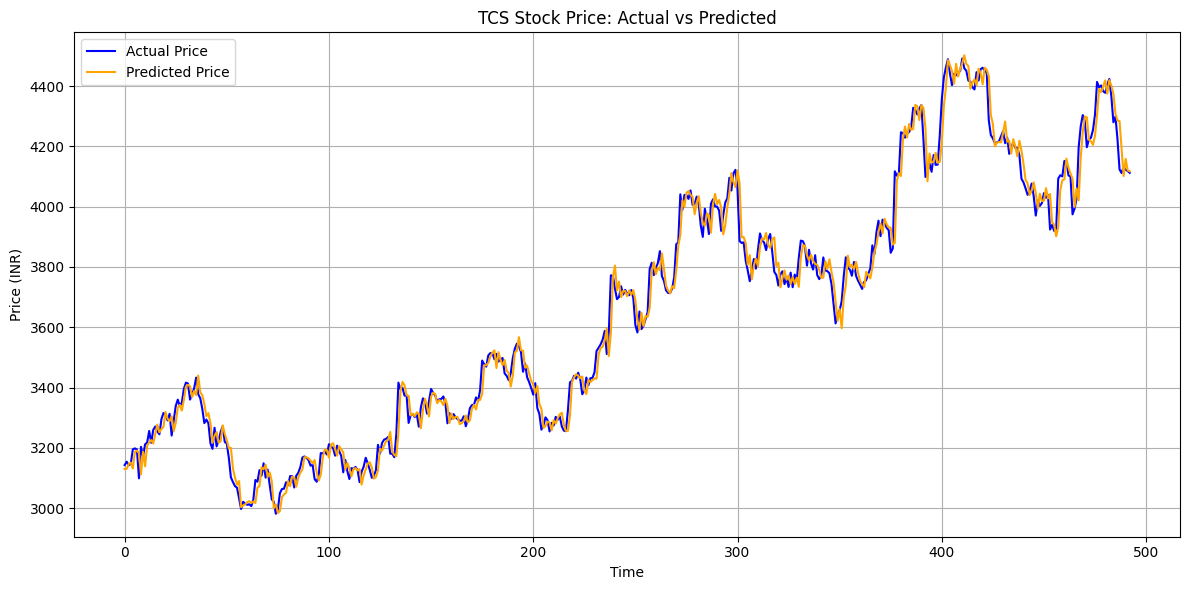

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='Actual Price', color='blue')
plt.plot(y_pred, label='Predicted Price', color='orange')
plt.title('TCS Stock Price: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()